# Flowchart Optimization

By using the simulator in conjuction with nonlinear root-finding methods such as the bisection method, we can optimize flowcharts to determine precisely how much money/eco we should have at a certain point in the game in order to meet our goals. In this example, we determine the minimum amount of eco necessary to have on R10 of a game on bot factory with boat mortar in order to be able to afford our "Big One" mortar upgrade on R13 following a merchantman sell.

In [1]:
import b2sim as b2
from copy import deepcopy as dc

The minimum eco that we need by Round 10 is 984.1111898422241
The current cash and eco are (0.0007085800170898438,1179.1111898422241)


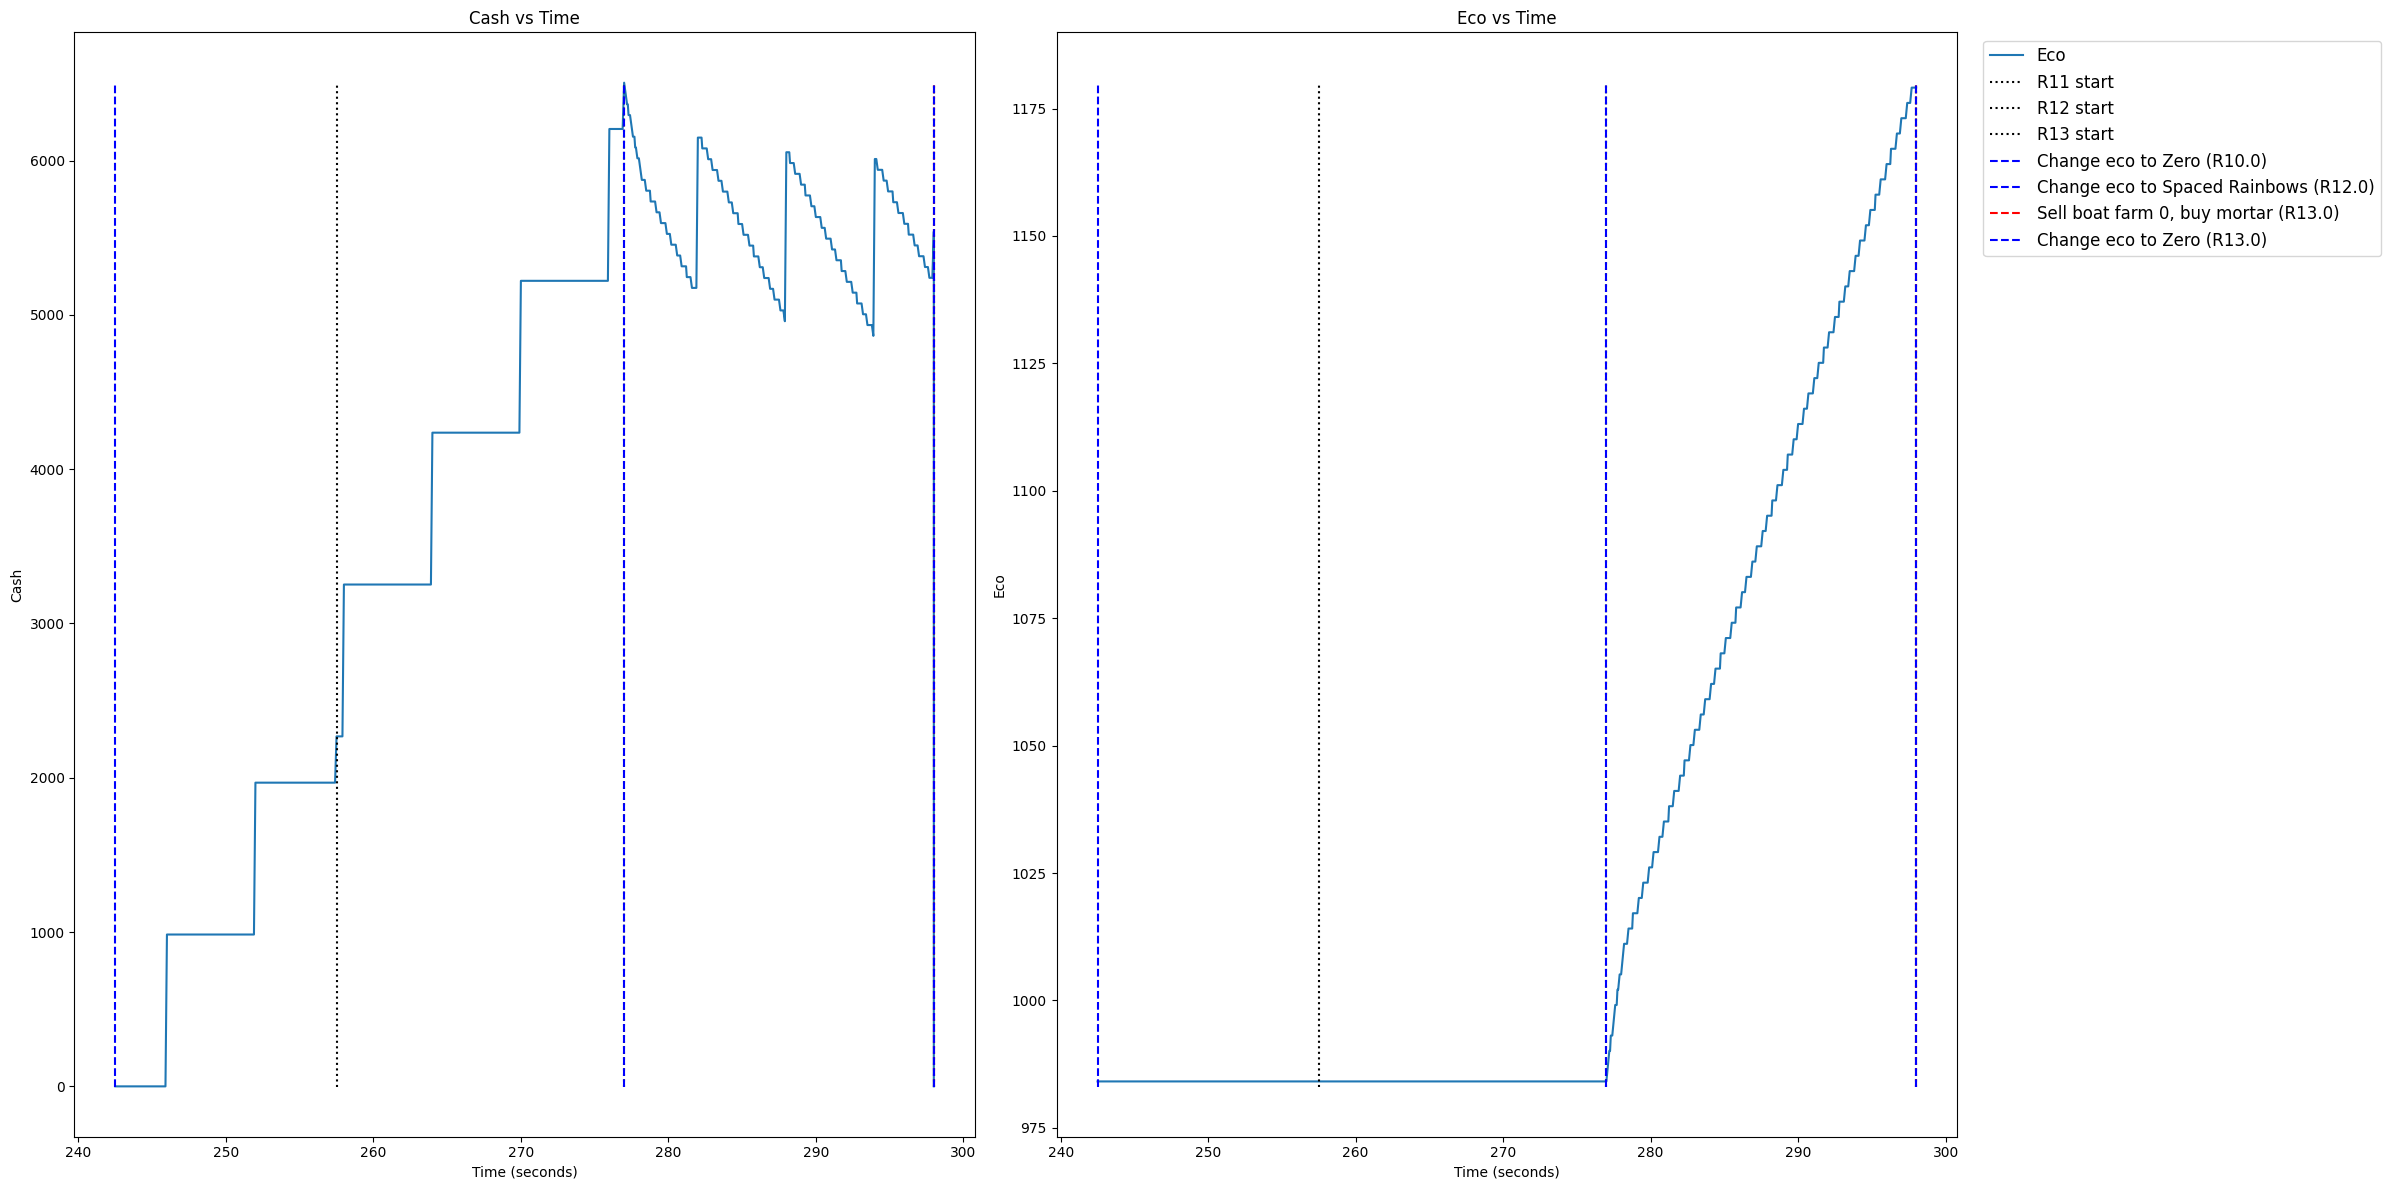

In [2]:
rounds = b2.Rounds(0.5) #Half-stall is probably a good assumption

buy_queue = [
    #Sell boat, upgrade mortar to 420
    [b2.sellBoatFarm(0), b2.buyDefense(7500, min_buy_time=rounds.getTimeFromRound(13), message="buy mortar")],
]

boat_farms = [
    b2.initBoatFarm(rounds.getTimeFromRound(5.9),3)
]

eco_queue = [
    b2.ecoSend(time = rounds.getTimeFromRound(12), send_name='Spaced Rainbows'),
    b2.ecoSend(time = rounds.getTimeFromRound(13), send_name='Zero')
]

def foo(starting_eco):

    initial_state_game = {
        'Cash': 0,
        'Eco': starting_eco,
        'Eco Send': b2.ecoSend(send_name='Zero'),
        'Boat Farms': dc(boat_farms),
        'Rounds': rounds,
        'Game Round': 10,
        'Eco Queue': dc(eco_queue),
        'Buy Queue': dc(buy_queue)
    }

    game_state = b2.GameState(initial_state_game)
    game_state.fastForward(target_round = 13)

    if len(game_state.buy_queue) > 0:
        return False
    else:
        return True
    
a = 750
b = 1000
iterations = 20

for i in range(iterations):
    c = 0.5*(a+b)
    if foo(c):
        b = c
    else:
        a = c

starting_eco = 0.5*(a+b)
print("The minimum eco that we need by Round 10 is %s"%(starting_eco))

initial_state_game = {
    'Cash': 0,
    'Eco': starting_eco,
    'Eco Send': b2.ecoSend(send_name='Zero'),
    'Boat Farms': boat_farms,
    'Eco Queue': eco_queue,
    'Rounds': rounds,
    'Game Round': 10,
    'Buy Queue': buy_queue
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 13)
game_state.viewCashEcoHistory((24,12))
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'saving_for_mortar')